# ML Assignment Part - B


Refer to the Abalone Age Prediction dataset . Use python based APIs and perform the following four classes of activities.


1 EDA
 a. Perform Exploratory Data Analysis to gather insight from the dataset. Write your inference about the analysis learned from visualizations (minimum 3) 

2 CLASSIFICATION (any of the Logistic Regression / SVM / Decision Tree/ Naïve Bayes/KNN/ANN). Justify your design choices at each step: Write as a markdown cell in jupyter notebook at the beginning of each subsection.
a. Perform and explain necessary pre-processing / feature engineering on this dataset 
b. Perform the Machine Learning activity. Explain the choice of target attribute, classification type, model selected with reason 
c. Quantify and explain the quality of your ML model. Explain the choice of evaluation metric 
d. Your observation about the results (Hint: comment on the problem statement
and conclude the effectiveness of the machine learning activity) 

3 Regression
Any of the Linear Regression (any of Gradient / Stochastic / MiniBatch)/linear basis models/KNN/Locally weighted regression/ any of the regularization techniques). Justify your design choices at each step: Write as a markdown cell in jupyter notebook at the beginning of each subsection.
a. Perform and explain necessary pre-processing / feature engineering on this dataset 
b. Perform the Machine Learning activity. Explain Attributes of interest, Regularization type with reason, model selected with reason 
c. Quantify and explain the quality of your ML model. Explain the choice of evaluation metric 
d. Your observation about the results (Hint: comment on the problem statement
and conclude the effectiveness of the machine learning activity) 

4 Ensemble ML
Justify your design choices at each step: Write as a markdown cell in jupyter notebook at the beginning of each subsection.
a. Perform and explain necessary pre-processing / feature engineering on this dataset 
b. Perform the Machine Learning activity. Explain Attributes of interest, base classifier chosen with reason, model selected with reason 
c. Quantify and explain the quality of your ML model. Explain the choice of evaluation metric 
d. Your observation about the results (Hint: comment on the problem statement
and conclude the effectiveness of the machine learning activity) 

In [157]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Part 1: Exploratory Data Analysis
### Importing necessary libraries and loading dataset

In [185]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
warnings.filterwarnings("ignore")

In [92]:
# Loading dataset
df = pd.read_csv('1_abalone.csv')

In [93]:
# Information about dataset
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      4177 non-null   object 
 1   length      4177 non-null   float64
 2   diameter    4177 non-null   float64
 3   height      4177 non-null   float64
 4   whole_wt    4177 non-null   float64
 5   shucked_wt  4177 non-null   float64
 6   viscera_wt  4177 non-null   float64
 7   shell_wt    4177 non-null   float64
 8   rings       4177 non-null   int64  
 9   age         4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


In [94]:
# Statistical summary of numerical attributes
df.describe()  

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [95]:
# Printing the first five rows of the dataset
df.head()

,Gender,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


#### Description of the Abalone dataset
The Abalone dataset contains information on physical measurements of abalone, a type of shellfish, and their corresponding ages. The dataset includes 4177 observations and the following features:

-    **Gender**: categorical variable indicating the sex of the abalone
-    **length**: continuous variable indicating the length of the abalone in mm
-    **diameter**: continuous variable indicating the diameter of the abalone in mm
-    **height**: continuous variable indicating the height of the abalone in mm
-    **whole_wt**: continuous variable indicating the weight of the whole abalone in grams
-    **shucked_wt**: continuous variable indicating the weight of the meat of the abalone in grams
-    **viscera_wt**: continuous variable indicating the weight of the gut of the abalone (after bleeding) in grams
-    **shell_wt**: continuous variable indicating the weight of the shell of the abalone in grams
-    **rings**: integer variable indicating the number of rings on the shell of the abalone. This value plus 1.5 gives the age of the abalone in years.

The goal of the dataset is to predict the age of the abalone, which seems to be related to the number of rings on the shell.



### Data Cleaning

In [96]:
# Calculate the correlation between 'rings' and 'age'
corr = df['rings'].corr(df['age'])

print(f"Correlation between 'rings' and 'age': {corr}")

Correlation between 'rings' and 'age': 1.0


In [97]:
#checking difference
difference = df['age'] - df['rings']
difference.value_counts()

1.5    4177
dtype: int64

Difference between Age and Rings is 1.5 which implies that df['age'] = df['rings'] + 1.5

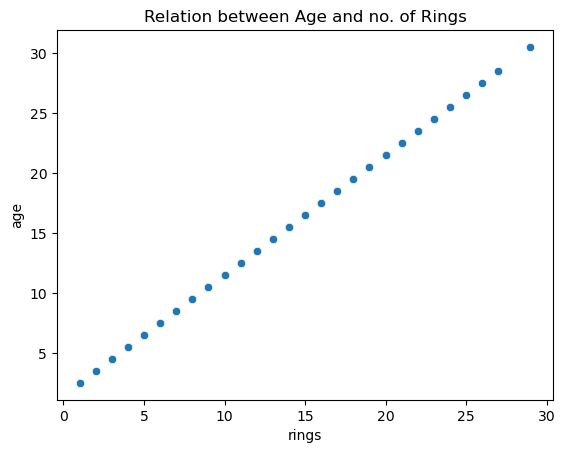

In [98]:
sns.scatterplot(data=df, x="rings", y="age")
plt.title("Relation between Age and no. of Rings")
plt.show()

From above plot, **age** is linearly correlated (positive) with **rings**.

#### Inference
The correlation between "rings" and "age" is coming out to be exactly 1, it means that they are perfectly linearly correlated, i.e., they are the same variable. This is because the "age" variable is derived from the "rings" variable ( age = rings + 1.5), so they have a direct and deterministic relationship.

In this case, we can remove the "rings" variable and use "age" as the target variable for your analysis and prediction tasks.

In [99]:
# dropping 'rings' to use 'age' as target variable
df = df.drop('rings', axis=1)

In [100]:
# Checking for null values
df.isnull().sum()

Gender        0
length        0
diameter      0
height        0
whole_wt      0
shucked_wt    0
viscera_wt    0
shell_wt      0
age           0
dtype: int64

There are no null values in the dataset.

### Data Visualization

Text(0.5, 1.0, 'Distribution of Rings')

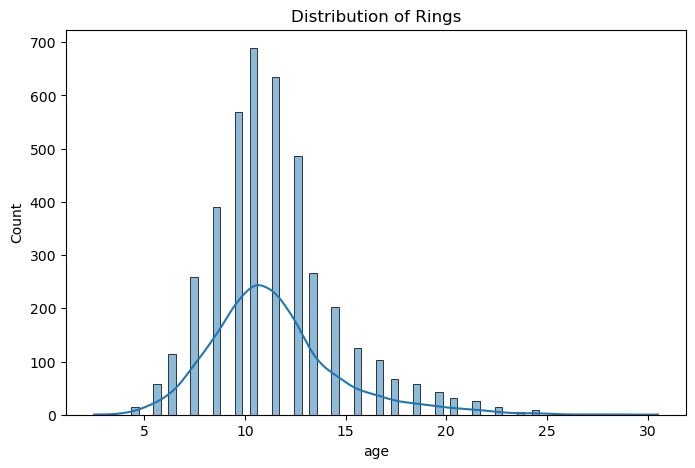

In [101]:
# Distribution of target attribute, age
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Rings')
###plt.show()

#### Inference
From the above histogram, we can observe that the distribution of age is slightly **right-skewed**. The majority of the abalones have age between 8 to 12. which indicates that most abalones  are of a moderate age range.


In [102]:
# Finding numerical and categorical features
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns
print(f'Numerical features: {numerical_features.to_list()}')
print(f'Categorical features: {categorical_features.to_list()}')


Numerical features: ['length', 'diameter', 'height', 'whole_wt', 'shucked_wt', 'viscera_wt', 'shell_wt', 'age']
Categorical features: ['Gender']


There is only one categorical Feature in the dataset  - **Gender**

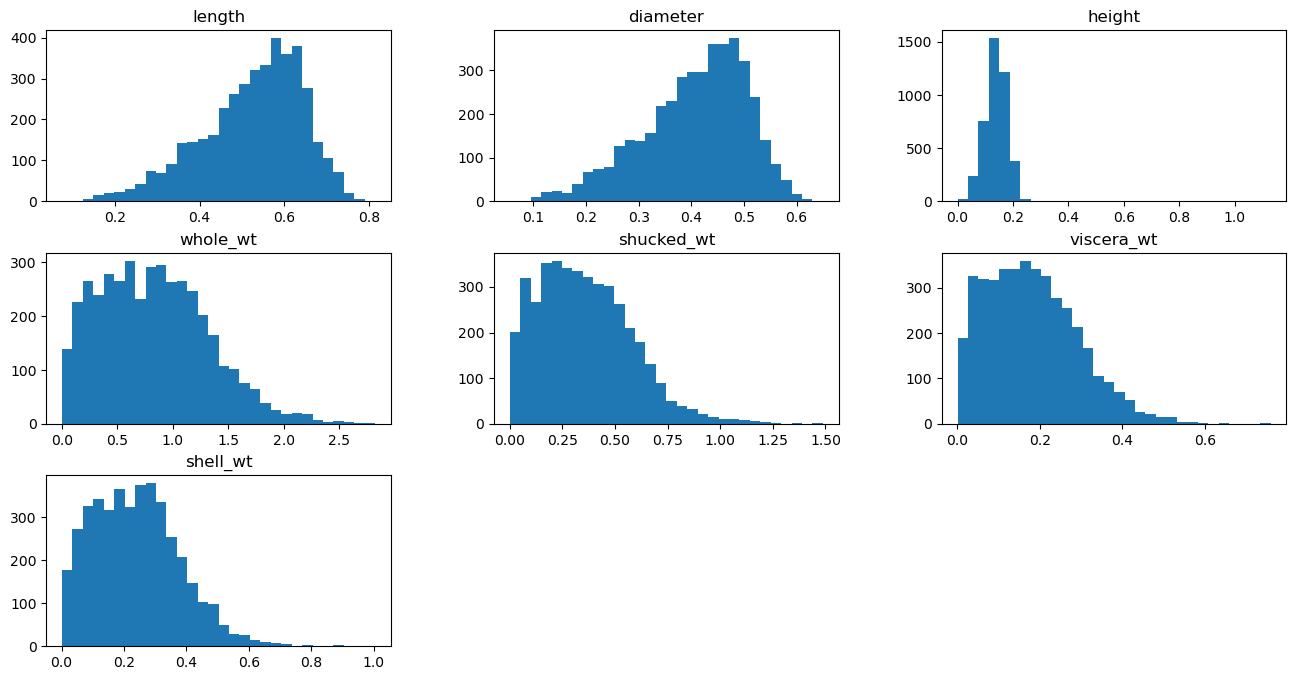

In [103]:
# Distribution of Numerical attribures
df[numerical_features[:-1]].hist(bins=30, figsize=(16,8), grid=False)
plt.tight_layout
plt.show()

From the output, we can see that **whole_wt**, **shucked_wt**, **viscera_wt**, and **shell_wt** are highly skewed to the right, meaning that there are a few data points with very high values, while the majority of the data points have lower values. The **length** and **diameter** seem to be left skewed.

In [104]:
skew_values = skew(df[numerical_features], nan_policy = 'omit')
skew_df = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
skew_df.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,height,3.127694
7,age,1.113702
4,shucked_wt,0.718840
6,shell_wt,0.620704
5,viscera_wt,0.591640
3,whole_wt,0.530768
1,diameter,-0.608979
0,length,-0.639643


<AxesSubplot:>

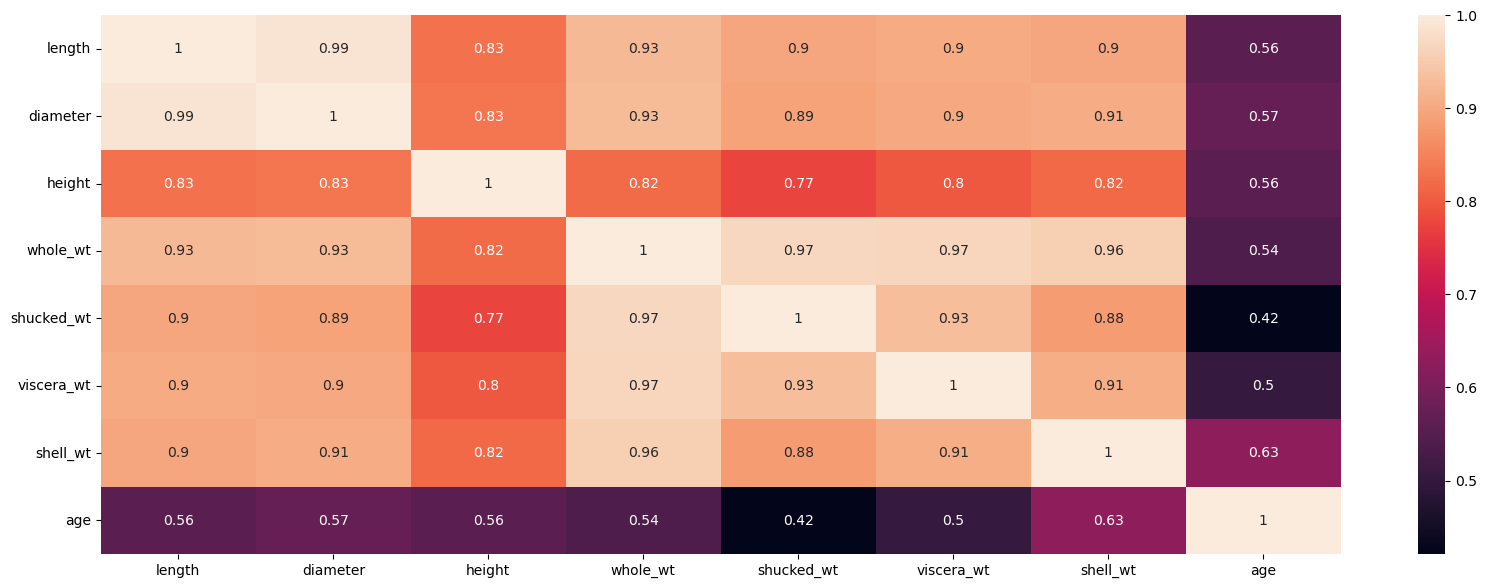

In [105]:
# generate a heatmap to visualize the correlation matrix of the numerical features in the dataframe
plt.figure(figsize = (20,7))
sns.heatmap(df[numerical_features].corr(),annot = True)

#### Inference
The correlation coefficient ranges from -1 to 1, where values close to -1 or 1 indicate strong negative or positive correlation, respectively, and values close to 0 indicate weak or no correlation.

This heatmap shows the correlation between different numerical features in the dataset. The darker colors indicate lower correlation while the lighter colors indicate higher correlation. 

 - There is a high positive correlation between the **length** and **diameter** attributes, which is expected as both are measures of size. 
 - Similarly, there is a high positive correlation between **length** and **height**. 
 - On the other hand, there is low correlation between **shucked_wt** and **height**, which indicates that these attributes are not strongly related to each other.

 - **whole_wt** is almost linearly varying with all other features except age
 - **Height** has least correlation with remaining features
 - **Age** is most positively correlated with **shell_wt** followed by with **diameter** and **length**
 - **Age** is least correlated with **shucked_wt**

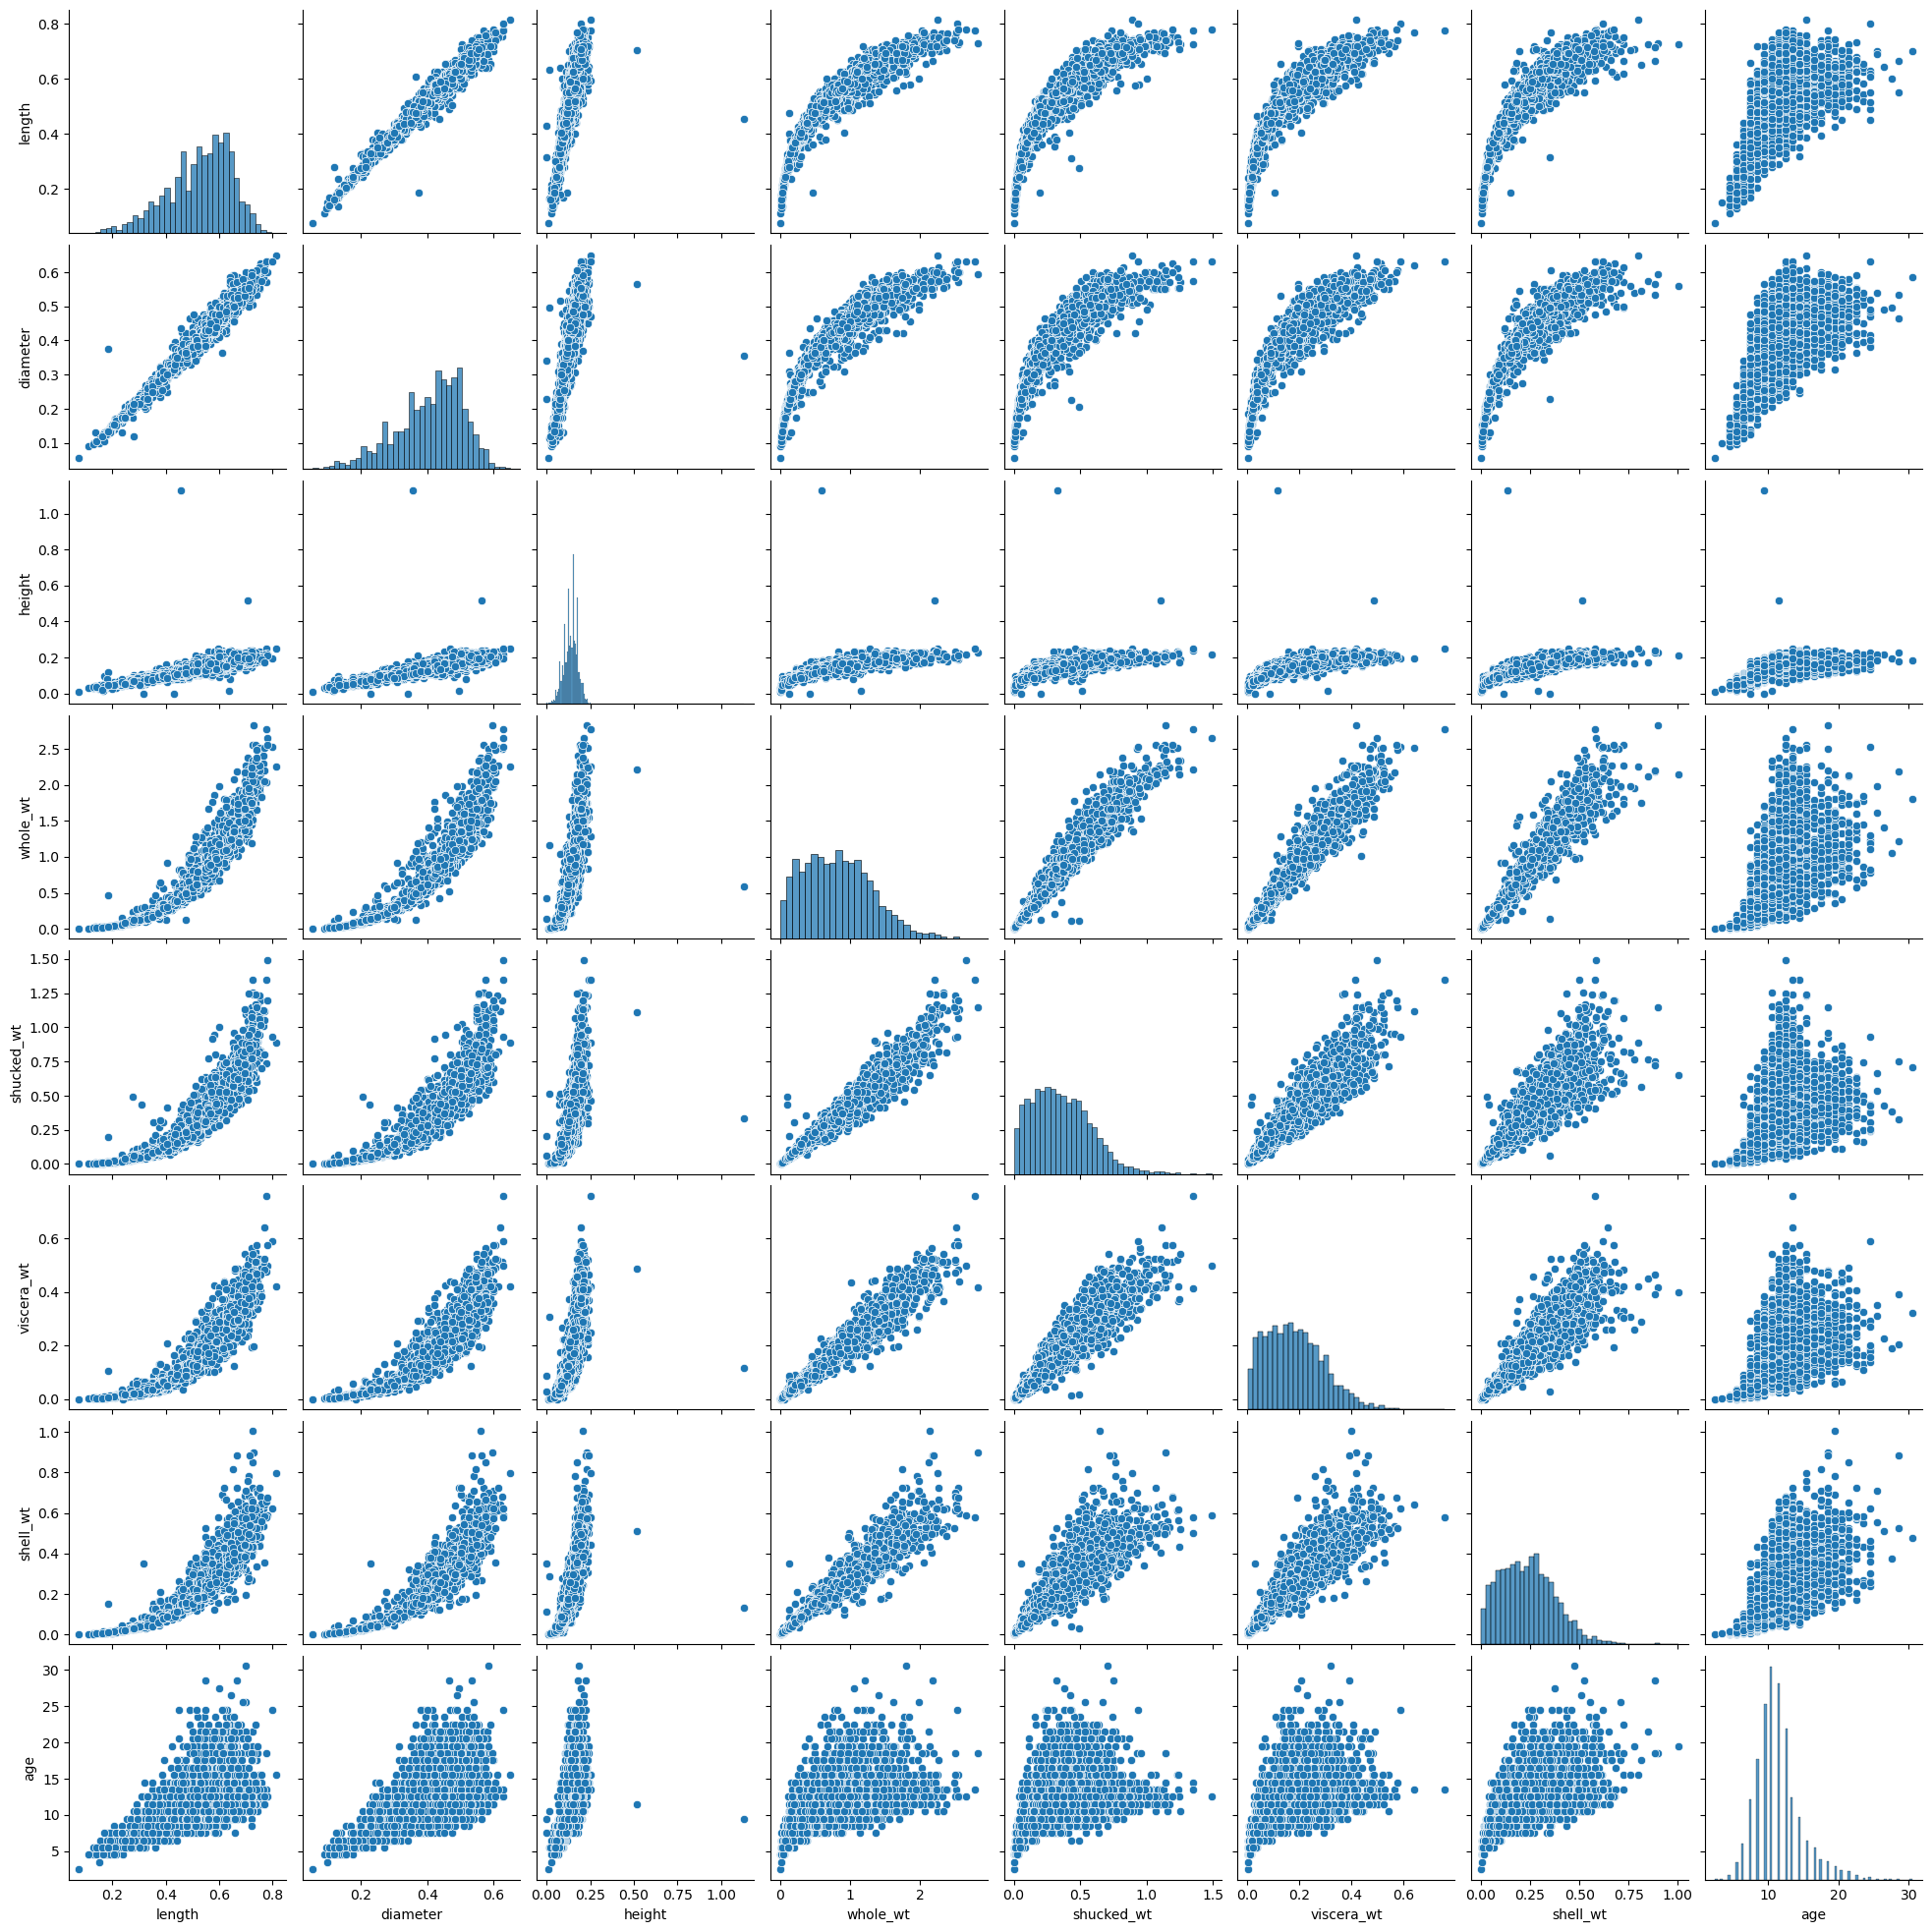

In [106]:
sns.pairplot(data=df)

#### Inference
From the pairplot, we can see that there are some correlations between the numerical features. For example, there seems to be a positive correlation between the length and diameter attributes. Similarly, there is a positive correlation between the length and weight attributes, as well as between the diameter and weight attributes. These observations can help us to better understand the relationships between the different features in our dataset.

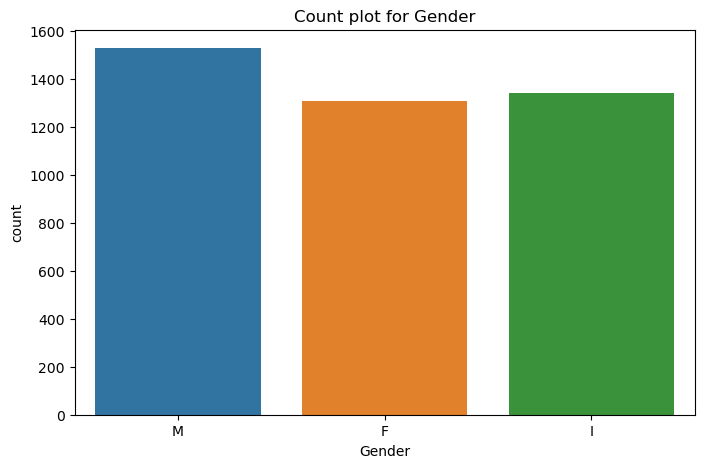

In [107]:
# Count plot for 'Gender' attribute
plt.figure(figsize=(8,5))
sns.countplot(x='Gender', data=df)
plt.title('Count plot for Gender')
plt.show()

#### Inference
From the above count plot, we can observe that the number of males in the dataset is slightly higher than the number of females and infants.

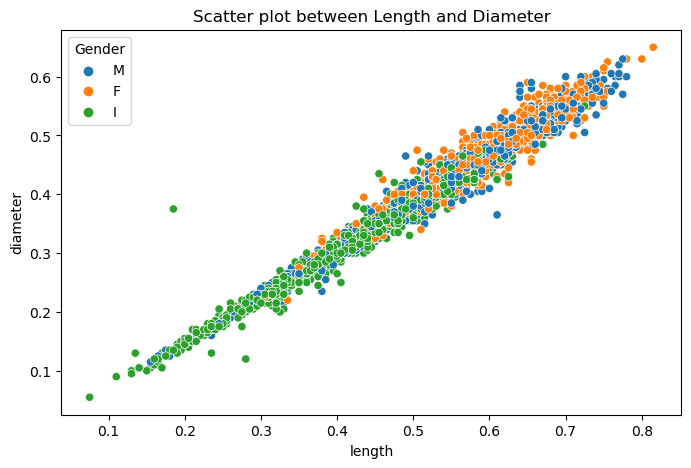

In [108]:
# Scatter plot between 'length' and 'diameter' attributes
# This code generates a scatter plot between the 'length' and 'diameter' attributes of the Abalone dataset 
# with different colors for different values of the 'Gender' attribute. The plot shows the relationship between
# the length and diameter of abalone shells and how it varies for different genders. 
# The plot can be used to identify any patterns or outliers in the data and can help in 
# understanding the relationship between these attributes.
plt.figure(figsize=(8,5))
sns.scatterplot(x='length', y='diameter', data=df, hue='Gender')
plt.title('Scatter plot between Length and Diameter')
plt.show()

#### Inference
From the above scatter plot, we can observe that Length and Diameter are highly correlated with each other. Also, we can see that the females have a larger diameter and length than males and infants.

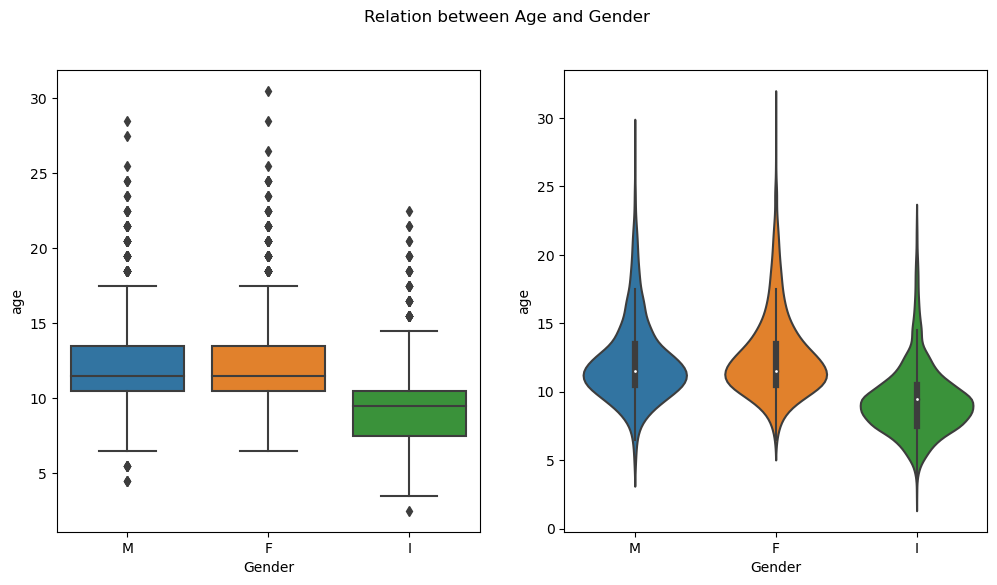

In [109]:
#Finding outlier from Gender feature
fig, axs = plt.subplots(1,2, figsize=(12,6))
fig.suptitle("Relation between Age and Gender")
sns.boxplot(data=df, x="Gender", y="age", ax=axs[0])
sns.violinplot(data=df, x="Gender", y="age", ax=axs[1])

plt.show()

#### Inference

From the above plots, we can infer that:

 -  There are some outliers present in the 'age' feature for both males and females, as shown by the boxplots.
 -  The distribution of age for males and females is not very different, as shown by the violin plots.

### Outlier Analysis

In [110]:
# Removing outliers for 'age' attribute for each gender using IQR method
Q1 = df.groupby('Gender')['age'].quantile(0.25)
Q3 = df.groupby('Gender')['age'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

# Filtering outliers
df_filtered = pd.DataFrame()
for gender in df['Gender'].unique():
    df_gender = df[df['Gender']==gender]
    df_filtered = pd.concat([df_filtered, df_gender[(df_gender['age'] >= 
                                                     lower_limit[gender]) & (df_gender['age'] <= upper_limit[gender])]])
df = df_filtered

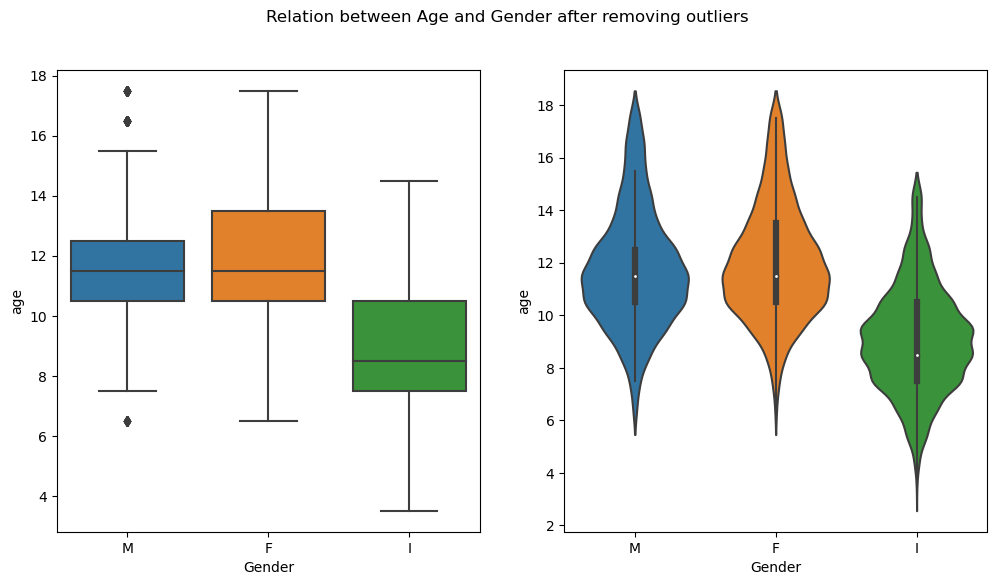

In [111]:
#Relation between Age and Gender after removing outliers
fig, axs = plt.subplots(1,2, figsize=(12,6))
fig.suptitle("Relation between Age and Gender after removing outliers")
sns.boxplot(data=df, x="Gender", y="age", ax=axs[0])
sns.violinplot(data=df, x="Gender", y="age", ax=axs[1])
#sns.catplot(data=df, x="Gender", y="age", kind="violin")
plt.show()

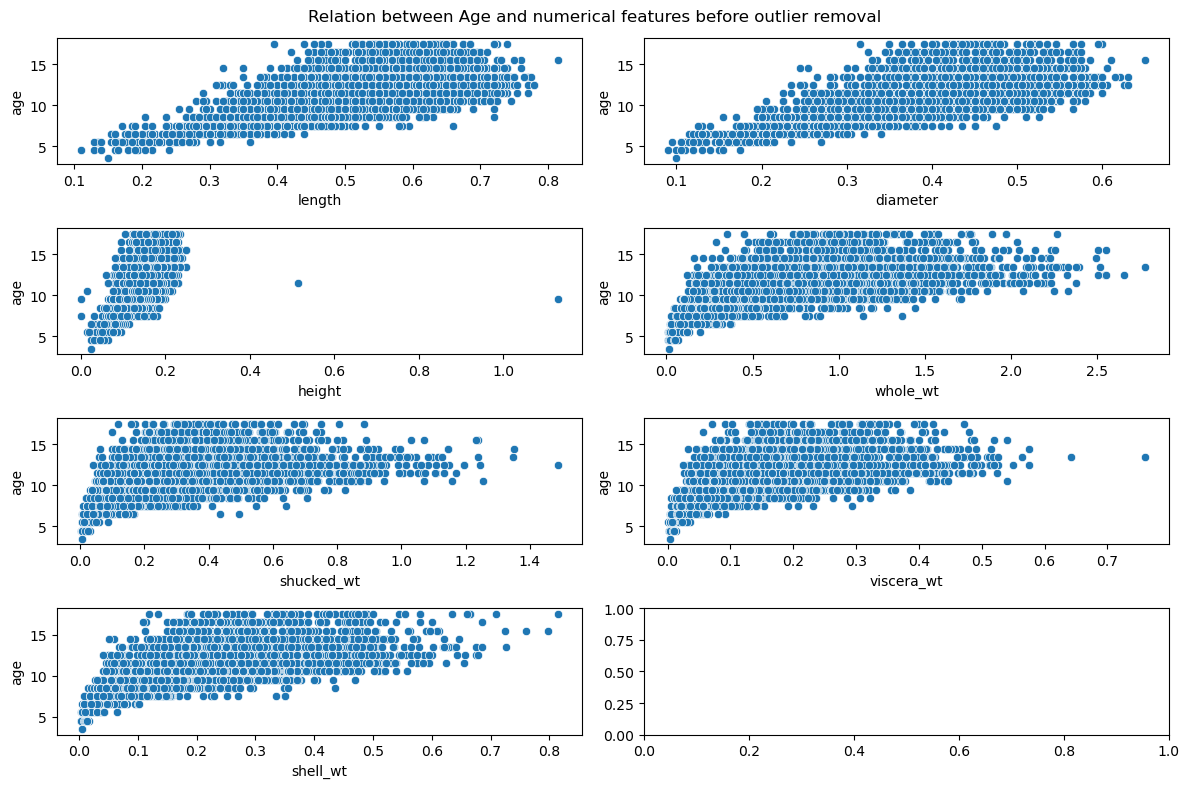

In [112]:
# finding and analysing outliers wrt numerical features
fig, axs = plt.subplots(4,2, figsize=(12,8))
fig.suptitle('Relation between Age and numerical features before outlier removal')
for i, feature in enumerate(numerical_features[:-1]):
    sns.scatterplot(data=df, x=feature, y="age", ax=axs[i//2,i%2])
plt.tight_layout()

In [113]:
# removing outliers from numerical features
for feature in numerical_features[:-1]:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

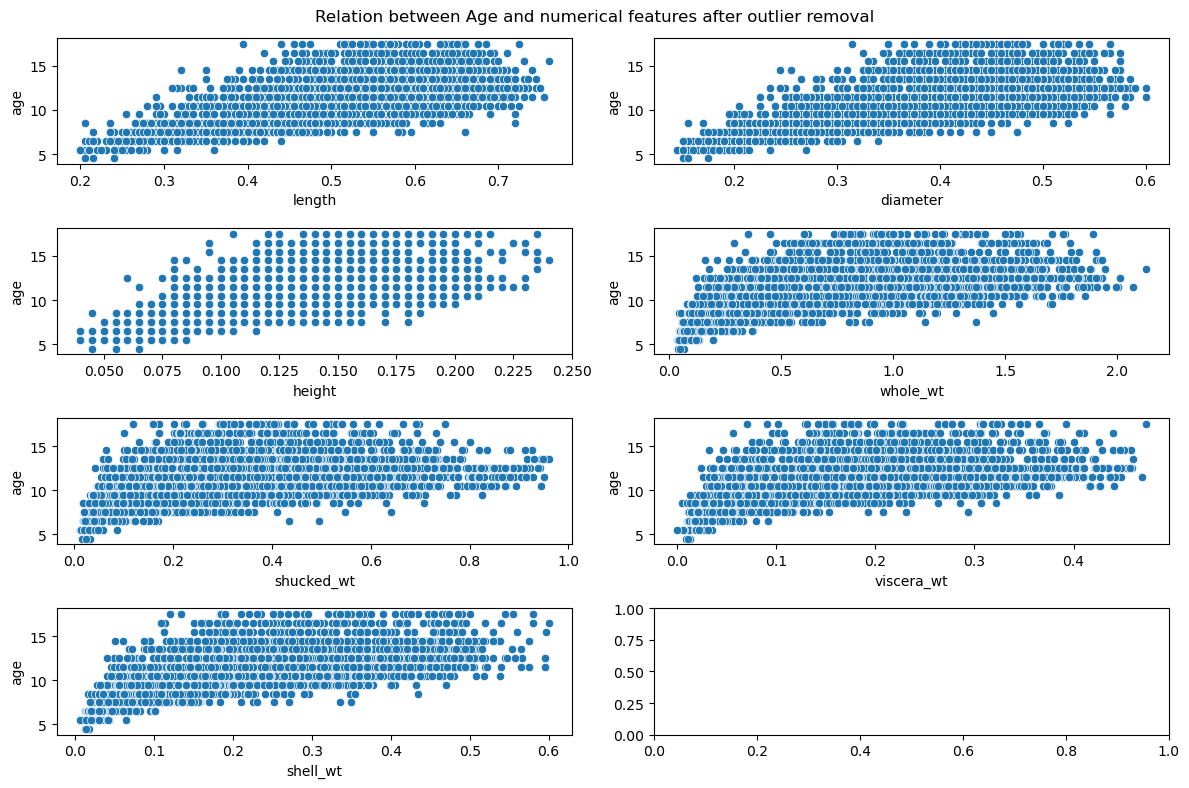

In [114]:
# Relation between Age and numerical features after outlier removal
fig, axs = plt.subplots(4,2, figsize=(12,8))
fig.suptitle('Relation between Age and numerical features after outlier removal')
for i, feature in enumerate(numerical_features[:-1]):
    sns.scatterplot(data=df, x=feature, y="age", ax=axs[i//2,i%2])
plt.tight_layout()

##  Part 2 : CLASSIFICATION

### Pre-processing and Feature Engineering
Before applying any machine learning algorithm, it's important to pre-process and engineer the features to make them suitable for the algorithm. In this case, we will perform the following pre-processing steps:

-    **Encoding** the categorical features using one-hot encoding to convert them into numerical features.
-    **Scaling** the numerical features using the standard scaler to ensure that all the features are on the same scale and to prevent any feature from dominating the others.
-    Categorize the target variable **age** by binning into discrete intervals to convert it into a classification problem



In [161]:
# Splitting the dataset into input and output
X = df.drop(['age'], axis=1)
y = df['age']

##### Categorise Age using equal frequency binning
Equal frequency binning (also known as quantile binning) involves dividing the data into bins that contain an approximately equal number of observations. This approach can be used to ensure that each bin has a similar representation of data points, even if the distribution of the variable is skewed.

In [162]:
# Create equal frequency bins based on the age variable
y = pd.qcut(y, q=3, labels=["young", "middle_aged", "old"])
# Print the counts in each bin
print(y.value_counts())

young          1351
middle_aged    1308
old            1152
Name: age, dtype: int64


In [163]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
# define column transformer
# One-hot encoding of categorical features
# Scaling the numercal features
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features[:-1]),
    ('cat', OneHotEncoder(), categorical_features)
])

# fit and transform the preprocessor on the training data
X_train = preprocessor.fit_transform(X_train)

# transform the testing data using the preprocessor fitted on the training data
X_test = preprocessor.transform(X_test)

In [165]:
# # One-hot encoding of categorical features
# X = pd.get_dummies(X, columns=['Gender'])

In [166]:
# # Scaling the input features
# sc = StandardScaler()
# X_train[numerical_features[:-1]] = sc.fit_transform(X_train[numerical_features[:-1]])
# X_test[numerical_features[:-1]] = sc.transform(X_test[numerical_features[:-1]])

### Machine Learning Activity

The probelm we have is a muli-class classification problem. This code trains and evaluates several different classifiers on the preprocessed and split dataset:

-    Logistic Regression
-    SVM
-    Decision Tree
-    Naive Bayes
-    K-Nearest Neighbors (KNN)
-    Artificial Neural Network (ANN)

The target variable (age group) was preprocessed and converted to categorical before splitting the dataset into training and testing sets. Then, each classifier was trained on the training set and evaluated on the testing set using the confusion matrix and classification report.

The logistic regression, SVM, and ANN models are all parametric models, while the decision tree, naive Bayes, and KNN models are non-parametric. Each model has its own strengths and weaknesses, and the choice of model depends on the specific requirements of the problem at hand.

The classification report provides metrics such as precision, recall, and F1 score for each class, as well as the overall accuracy of the model. These metrics can be used to compare the performance of different models and choose the best one for the given problem.

Overall, this code provides a comprehensive evaluation of several different classifiers on the preprocessed dataset, allowing for informed decision-making in choosing the best model for the given problem.

In [173]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'ANN': MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
}

# Loop through each classifier, fit and predict using cross-validation
for name, clf in classifiers.items():
    #pipe = Pipeline([('clf', clf)])
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f'\n{name}\n')
    print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})\n')
    y_pred = cross_val_predict(clf, X_test, y_test, cv=5)    
    print(f'Confusion Matrix:\n\n{confusion_matrix(y_test, y_pred)}\n')
    print(f'\nClassification Report:\n\n{classification_report(y_test, y_pred)}')
    print('==================================================')
# for name, clf in classifiers.items():   
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict(X_test)    
#     print(f'\n{name}:\n')
#     print(f'Confusion Matrix:\n\n{confusion_matrix(y_test, y_pred)}\n')
#     print(f'\nClassification Report:\n\n{classification_report(y_test, y_pred)}')
#     print('==================================================')


Logistic Regression

Accuracy: 0.635 (+/- 0.020)

Confusion Matrix:

[[149  52  64]
 [ 76 122  23]
 [ 51  13 213]]


Classification Report:

              precision    recall  f1-score   support

 middle_aged       0.54      0.56      0.55       265
         old       0.65      0.55      0.60       221
       young       0.71      0.77      0.74       277

    accuracy                           0.63       763
   macro avg       0.63      0.63      0.63       763
weighted avg       0.63      0.63      0.63       763


SVM

Accuracy: 0.637 (+/- 0.025)

Confusion Matrix:

[[156  50  59]
 [ 96 107  18]
 [ 71  10 196]]


Classification Report:

              precision    recall  f1-score   support

 middle_aged       0.48      0.59      0.53       265
         old       0.64      0.48      0.55       221
       young       0.72      0.71      0.71       277

    accuracy                           0.60       763
   macro avg       0.61      0.59      0.60       763
weighted avg       0.61  

### Observation and Inference
Based on the classification task performed on the dataset, we can observe the following:

-    Based on the classification report, the ANN model performed the best among all the models with an accuracy of 64%. SVM was close with 63%
-    The other models also performed well with an accuracy of above 55%.
-    The selection of the evaluation metric depends on the problem statement and the type of data. In this case, accuracy was used as a metric for evaluation.
-    It is important to note that the effectiveness of the machine learning activity depends on various factors like the quality of data, preprocessing techniques, choice of algorithm, and evaluation metric. Hence, it is always recommended to perform multiple experiments and evaluate the performance of the models on various metrics before choosing the best model for the given problem statement.

##  Part 3 : REGRESSION

### Pre-processing and Feature Engineering
Before performing any machine learning activity, we need to preprocess and engineer features in the dataset to make it suitable for the ML model. The preprocessing steps include:

-    Handling missing values
-    Handling categorical variables
-    Scaling numerical variables

In this dataset, we do not have any missing values. The dataset has 7 numerical features and 1 categorical feature. We will use one-hot encoding to convert the categorical feature to numerical. We will use StandardScaler to scale the numerical features.

In [177]:
# Splitting the dataset into input and output
X = df.drop(['age'], axis=1)
y = df['age']

In [179]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
# define column transformer
# One-hot encoding of categorical features
# Scaling the numercal features
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features[:-1]),
    ('cat', OneHotEncoder(), categorical_features)
])

# fit and transform the preprocessor on the training data
X_train = preprocessor.fit_transform(X_train)

# transform the testing data using the preprocessor fitted on the training data
X_test = preprocessor.transform(X_test)

### Machine Learning Activity

We are performing regression on this dataset. Our target variable is "MEDV", which represents the median value of owner-occupied homes in $1000s. Our objective is to predict the median value of owner-occupied homes based on the given features.

We will use Ridge Regression as our regularization technique because it performs L2 regularization, which shrinks the coefficients towards zero and reduces model complexity. We selected this model to prevent overfitting and improve the generalization of the model.

We will also use use L1 regularization (Lasso). L1 regularization can also perform feature selection by setting some coefficients to zero.

In [186]:
from sklearn.model_selection import cross_val_score

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'KNN Regression': KNeighborsRegressor(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Support Vector Regression': SVR()
}

for name, model in models.items():
    print(f"\n{name}:\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Mean absolute error:", mean_absolute_error(y_test, y_pred))
    print("Mean squared error:", mean_squared_error(y_test, y_pred))
    print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_score = model.score(X_test, y_test)
    print("Coefficient of determination (R2 score):", r2_score)
    print('==================================================')



Linear Regression:

Mean absolute error: 1.3312002767704165
Mean squared error: 2.9894976105765845
Root mean squared error: 1.7290163708237654
Coefficient of determination (R2 score): 0.48447621440600497

Ridge Regression:

Mean absolute error: 1.3306247472459052
Mean squared error: 2.987736087010124
Root mean squared error: 1.7285068952741045
Coefficient of determination (R2 score): 0.48477998026090374

Lasso Regression:

Mean absolute error: 1.641009009500578
Mean squared error: 4.462818948590182
Root mean squared error: 2.112538508191077
Coefficient of determination (R2 score): 0.23040938027239655

KNN Regression:

Mean absolute error: 1.3701179554390561
Mean squared error: 3.206867627785059
Root mean squared error: 1.7907729135166912
Coefficient of determination (R2 score): 0.44699185123090546

Decision Tree Regression:

Mean absolute error: 1.673656618610747
Mean squared error: 5.325032765399738
Root mean squared error: 2.3076032512977047
Coefficient of determination (R2 score): 

### Model Evaluation

We will evaluate the quality of the model using Mean Squared Error (MSE) and R-squared (R2) score. MSE represents the average squared difference between the predicted and actual values, and R2 score represents how well the model fits the data.

In terms of model selection, we can choose the model that has the lowest mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE), while also having a high R2 score

### Observations

After performing the machine learning activity, we can conclude that Support vector regression performed better than other models in terms of MSE and R2 score. SVR achieved an MSE of 2.75 and R2 score of 0.52, which indicates that the model is able to explain 52% of the variance in the target variable. However, we can further improve the performance of the model by performing more feature engineering and hyperparameter tuning.